In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
x_train = np.load('/content/gdrive/My Drive/dataset/x_train.npy')
y_train = np.load('/content/gdrive/My Drive/dataset/y_train.npy')
x_val = np.load('/content/gdrive/My Drive/dataset/x_val.npy')
y_val = np.load('/content/gdrive/My Drive/dataset/y_val.npy')

print(x_train.shape, y_train.shape)
print(x_val.shape, y_val.shape)

(749, 256, 256, 3) (749, 256, 256, 1)
(84, 256, 256, 3) (84, 256, 256, 1)


In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(256,256,3), kernel_size=3, filters=32, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(strides=(2,2), pool_size=2, padding='same'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(strides=(2,2), pool_size=2, padding='same'),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, activation='relu', padding='same'),
    tf.keras.layers.MaxPooling2D(strides=(2,2), pool_size=2, padding='same'),
    tf.keras.layers.Dense(units=128, activation='relu'),
    tf.keras.layers.UpSampling2D(size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=128, activation='sigmoid', padding='same'),
    tf.keras.layers.UpSampling2D(size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=64, activation='sigmoid', padding='same'),
    tf.keras.layers.UpSampling2D(size=2),
    tf.keras.layers.Conv2D(kernel_size=3, filters=1, activation='sigmoid', padding='same'),
])

In [ ]:
model.compile(optimizer=tf.keras.optimizers.Adam(),
             loss= 'binary_crossentropy',
             metrics=['acc', 'mse'])
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 32, 32, 128)       1

In [ ]:
history = model.fit(x_train, y_train, 
                    validation_data=(x_val, y_val),epochs=500, 
                    callbacks=[tf.keras.callbacks.EarlyStopping(patience=15, monitor='val_loss')])

Epoch 1/500
24/24 [==============================] - 4s 152ms/step - loss: 0.3883 - acc: 0.8724 - mse: 0.1058 - val_loss: 0.2738 - val_acc: 0.9126 - val_mse: 0.0732
Epoch 2/500
24/24 [==============================] - 3s 112ms/step - loss: 0.2873 - acc: 0.9082 - mse: 0.0787 - val_loss: 0.2630 - val_acc: 0.9126 - val_mse: 0.0707
Epoch 3/500
24/24 [==============================] - 3s 112ms/step - loss: 0.2588 - acc: 0.9082 - mse: 0.0728 - val_loss: 0.2321 - val_acc: 0.9126 - val_mse: 0.0643
Epoch 4/500
24/24 [==============================] - 3s 111ms/step - loss: 0.2518 - acc: 0.9082 - mse: 0.0716 - val_loss: 0.2273 - val_acc: 0.9126 - val_mse: 0.0633
Epoch 5/500
24/24 [==============================] - 3s 112ms/step - loss: 0.2433 - acc: 0.9082 - mse: 0.0695 - val_loss: 0.2237 - val_acc: 0.9126 - val_mse: 0.0621
Epoch 6/500
24/24 [==============================] - 3s 112ms/step - loss: 0.2410 - acc: 0.9082 - mse: 0.0690 - val_loss: 0.2206 - val_acc: 0.9126 - val_mse: 0.0614
Epoch 7/50

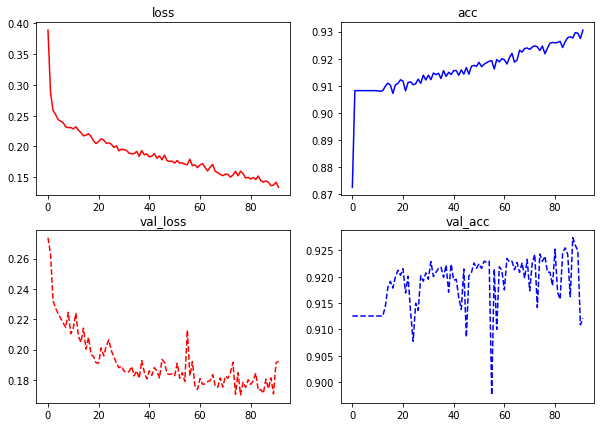

In [ ]:
fig, ax = plt.subplots(2, 2,figsize=(10,7))

ax[0,0].set_title('loss')
ax[0,0].plot(history.history['loss'], 'r')
ax[0,1].set_title('acc')
ax[0,1].plot(history.history['acc'], 'b')

ax[1,0].set_title('val_loss')
ax[1,0].plot(history.history['val_loss'], 'r--')
ax[1,1].set_title('val_acc')
ax[1,1].plot(history.history['val_acc'], 'b--')


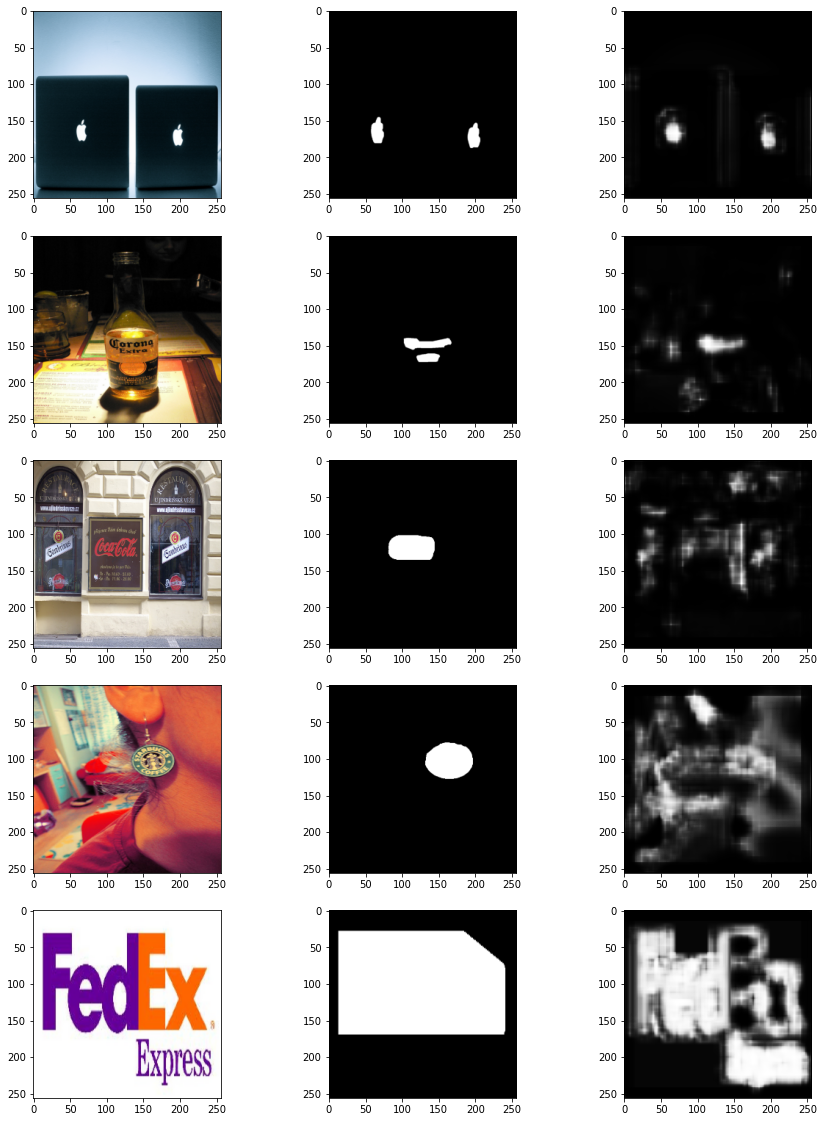

In [ ]:
# 일부만 출력
preds = model.predict(x_val)
fig, ax = plt.subplots(5, 3, figsize = (15, 20))
count = 0
for i, pred in enumerate(preds):
    if count == 5: break
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')
    count += 1

In [ ]:
# 전체출력
preds = model.predict(x_val)
fig, ax = plt.subplots(len(x_val), 3, figsize = (10, 300))

for i, pred in enumerate(preds):
    ax[i, 0].imshow(x_val[i].squeeze(), cmap='gray')
    ax[i, 1].imshow(y_val[i].squeeze(), cmap='gray')
    ax[i, 2].imshow(pred.squeeze(), cmap='gray')

In [ ]:
model.save('/content/gdrive/My Drive/model/first_model')

INFO:tensorflow:Assets written to: /content/gdrive/My Drive/model/first_model/assets


In [ ]:
new_model = tf.keras.models.load_model('/content/gdrive/My Drive/model/first_model')
new_model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 256, 256, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 128, 128, 32)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 128, 128, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 64, 64, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 64, 64, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 32, 32, 128)       0         
_________________________________________________________________
dense (Dense)                (None, 32, 32, 128)       1